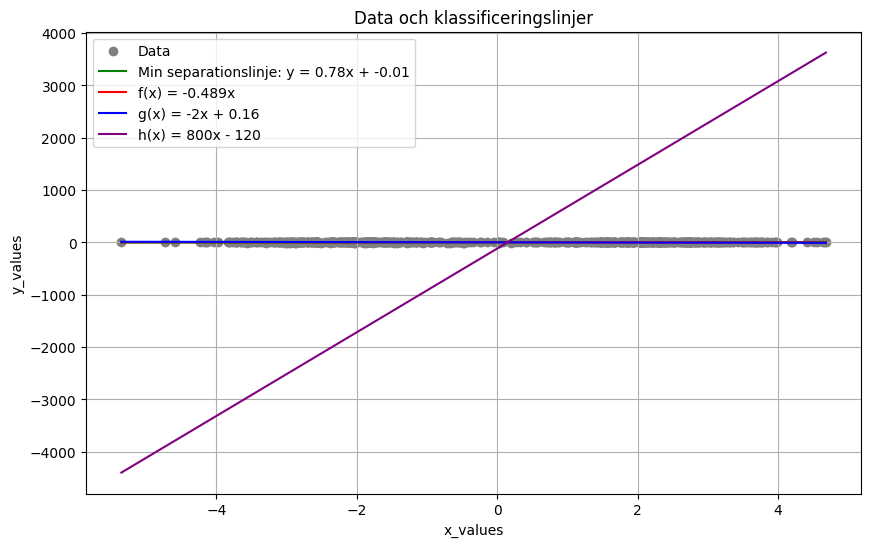


Klassificering med hjälp av de nya linjerna:
Antal data som klassificerades som 1 (över linjen) med varje funktion:
f(x) = -0.489x: 299
g(x) = -2x + 0.16: 299
h(x) = 800x - 120: 298

Jämförelse mellan klassificeringarna:
Skillnader mellan den ursprungliga linjen och de nya linjerna kan observeras baserat på skillnaderna i antal klassificerade data (1 eller 0).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Läs in filen och sätt kolumnnamn
data = pd.read_csv("unlabelled_data.csv", names=["x_values", "y_values"], header=None)

# Förbered data för att hitta linjär regression
X = data["x_values"].values
y = data["y_values"].values

# Beräkna linjens lutning och intercept med minstakvadratsmetoden
n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(y)
sum_xy = np.sum(X * y)
sum_x2 = np.sum(X**2)

# Beräkna lutning och intercept
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

# Använd min- och maxvärden för x_values för att skapa linjen
x_line = np.array([np.min(X), np.max(X)])  
y_line = m * x_line + b  

# Funktionerna f(x), g(x), h(x)
def f(x):
    return -0.489 * x

def g(x):
    return -2 * x + 0.16

def h(x):
    return 800 * x - 120

# Klassificering med hjälp av de olika linjerna
data["f_class"] = np.where(data["y_values"] > f(data["x_values"]), 0, 1)
data["g_class"] = np.where(data["y_values"] > g(data["x_values"]), 0, 1)
data["h_class"] = np.where(data["y_values"] > h(data["x_values"]), 0, 1)

# Plotta alla linjer
plt.figure(figsize=(10, 6))

# Plotta originaldata
plt.scatter(data["x_values"], data["y_values"], color="grey", label="Data")

# Plotta linjen för egen klassificering
plt.plot(x_line, y_line, color="green", label="Min separationslinje: y = {:.2f}x + {:.2f}".format(m, b))

# Plotta de andra linjerna
plt.plot(x_line, f(x_line), color="red", label="f(x) = -0.489x")
plt.plot(x_line, g(x_line), color="blue", label="g(x) = -2x + 0.16")
plt.plot(x_line, h(x_line), color="purple", label="h(x) = 800x - 120")

# Lägg till etiketter och titel
plt.title("Data och klassificeringslinjer")
plt.xlabel("x_values")
plt.ylabel("y_values")
plt.legend()
plt.grid(True)
plt.show()

# Skriv ut en kort analys
print("\nKlassificering med hjälp av de nya linjerna:")
print("Antal data som klassificerades som 1 (över linjen) med varje funktion:")

# Visa antal klassificerade data för varje linje
print("f(x) = -0.489x:", data["f_class"].sum())
print("g(x) = -2x + 0.16:", data["g_class"].sum())
print("h(x) = 800x - 120:", data["h_class"].sum())

print("\nJämförelse mellan klassificeringarna:")
print("Skillnader mellan den ursprungliga linjen och de nya linjerna kan observeras baserat på skillnaderna i antal klassificerade data (1 eller 0).")
